In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter

In [2]:
# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

In [3]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

In [4]:
# Define the number of clusters
k = 2

In [5]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [6]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [7]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0


In [8]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 to
 and
 read
 watch
 movies
 like
 books
 concerts
 going
 music

Cluster 1:
 playing
 the
 weekends
 on
 football
 video
 sports
 prefer
 over
 games



In [9]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.6


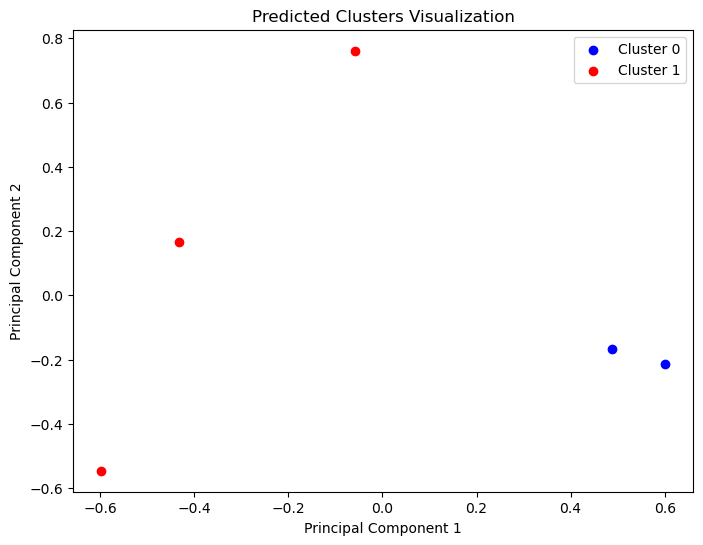

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Vectorizer TF-idf

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter

In [12]:
dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

In [13]:
tokenized_dataset = [doc.split() for doc in dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100,
window=5, min_count=1, workers=4)

In [14]:
X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in
word2vec_model.wv], axis=0) for doc in dataset])

In [15]:
k = 2 #Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [16]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [17]:
# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0


In [18]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)


Purity: 0.6


Exercise Question 1

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

In [34]:
dataset = [
    {'text':'I love playing football on the weekends'},
 {'text': 'I enjoy hiking and camping in the mountains'},
 {'text':'I like to read books and watch movies'},
 {'text': 'I prefer playing video games over sports'},
 {'text': 'I love listening to music and going to concerts'},
]
dataset

[{'text': 'I love playing football on the weekends'},
 {'text': 'I enjoy hiking and camping in the mountains'},
 {'text': 'I like to read books and watch movies'},
 {'text': 'I prefer playing video games over sports'},
 {'text': 'I love listening to music and going to concerts'}]

In [36]:
df = pd.DataFrame(dataset)

In [38]:
# Define the function to remove punctuation
def remove_punctuation(text):
    # Your implementation to remove punctuation
    pass

In [39]:
# Applying the remove_punctuation function to each element of the dataset and storing the result in a new column 'clean_punctuation'
df['clean_punctuation'] = df['text'].apply(remove_punctuation)

In [40]:
#applying the remove_punctuation function to the 'Review' column and storing the result in a new column 'clean_punctuation'
print(df)

                                              text clean_punctuation
0          I love playing football on the weekends              None
1      I enjoy hiking and camping in the mountains              None
2            I like to read books and watch movies              None
3         I prefer playing video games over sports              None
4  I love listening to music and going to concerts              None


In [43]:
#to standardize the cases in the documents into lower case
df['clean_lower']= df['text'].str.lower()

In [44]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  
0          i love playing football on the weekends  
1      i enjoy hiking and camping in the mountains  
2            i like to read books and watch movies  
3         i prefer playing video games over sports  
4  i love listening to music and going to concerts  


In [45]:
import re

In [46]:
def remove_numbers(text):
    return re.sub("[\d-]",'',text)

In [47]:
df['clean_number'] = df['text'].apply(remove_numbers)

In [48]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  
0          I love playing football on the weekends  
1      I enjoy hiking and camping in the mountains  
2            I like to read books and watch movies  
3         I prefer playing vid

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# import the library for word tokenization
from nltk.tokenize import word_tokenize

In [51]:
#the word tokens in the document
df['token_data']= df['clean_number'].apply(word_tokenize)

In [52]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [53]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
#Get the list of English stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

In [55]:
# Print the list of stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output

In [57]:
#Applying the remove_stopwords function to the 'token_data' column and storing the result in a new column 'clean_xstopwords'
df['clean_xstopwords'] = df['token_data'].apply(remove_stopwords)

In [58]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [59]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

In [60]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [61]:
#defining a function for stemming
def stemming(text):
    stem_text = []
    for word in text:
        stemmed_word = porter_stemmer.stem(word)
        stem_text.append(stemmed_word)
    return stem_text

In [62]:
#applying the stemming function to the 'clean_xstopwords' column and storing the result in a new column 'clean_stemmed'
df['clean_stemmed'] = df['clean_xstopwords'].apply(stemming)

In [63]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [64]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
#importing the Lemmatizer function from nltk library
from nltk.stem import WordNetLemmatizer

In [66]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [67]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemmatized_word)
    return lemm_text

In [68]:
#applying the lemmatizer function to the 'clean_xstopwords' column and storing the result in a new column 'clean_lemmatized1'
df['clean_lemmatized1']=df['clean_xstopwords'].apply(lemmatizer)

In [69]:
#applying the lemmatizer function to the 'clean_stemmed' column and storing the result in a new column 'clean_lemmatized2'
df['clean_lemmatized2']=df['clean_stemmed'].apply(lemmatizer)

In [70]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [76]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

In [81]:
k = 2  # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['clean_lemmatized2'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()



Document                                             Predicted Cluster
-------------------------------------------------  -------------------
['i', 'love', 'play', 'footbal', 'weekend']                          0
['i', 'enjoy', 'hike', 'camp', 'mountain']                           0
['i', 'like', 'read', 'book', 'watch', 'movi']                       1
['i', 'prefer', 'play', 'video', 'game', 'sport']                    0
['i', 'love', 'listen', 'music', 'go', 'concert']                    1

Top terms per cluster:
Cluster 0:
 playing
 the
 weekends
 on
 football
 video
 sports
 prefer
 over
 games

Cluster 1:
 to
 and
 read
 watch
 movies
 like
 books
 concerts
 going
 music



In [83]:
from collections import Counter
import itertools

# Flatten the lists in df['clean_lemmatized2']
flattened_list = list(itertools.chain.from_iterable(df['clean_lemmatized2']))

# Calculate purity
total_samples = len(flattened_list)
cluster_label_counts = Counter(flattened_list)
purity = max(cluster_label_counts.values()) / total_samples

print("Purity:", purity)


Purity: 0.17857142857142858


Yes the purity reading is different


# word2vec

In [84]:
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter


In [87]:
dataset = [
    {'text':'I love playing football on the weekends'},
 {'text': 'I enjoy hiking and camping in the mountains'},
 {'text':'I like to read books and watch movies'},
 {'text': 'I prefer playing video games over sports'},
 {'text': 'I love listening to music and going to concerts'},
]
dataset

[{'text': 'I love playing football on the weekends'},
 {'text': 'I enjoy hiking and camping in the mountains'},
 {'text': 'I like to read books and watch movies'},
 {'text': 'I prefer playing video games over sports'},
 {'text': 'I love listening to music and going to concerts'}]

In [88]:
df = pd.DataFrame(dataset)

In [89]:
# Define the function to remove punctuation
def remove_punctuation(text):
    # Your implementation to remove punctuation
    pass

In [90]:
# Applying the remove_punctuation function to each element of the dataset and storing the result in a new column 'clean_punctuation'
df['clean_punctuation'] = df['text'].apply(remove_punctuation)

In [91]:
print(df)

                                              text clean_punctuation
0          I love playing football on the weekends              None
1      I enjoy hiking and camping in the mountains              None
2            I like to read books and watch movies              None
3         I prefer playing video games over sports              None
4  I love listening to music and going to concerts              None


In [92]:
#to standardize the cases in the documents into lower case
df['clean_lower']= df['text'].str.lower()

In [93]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  
0          i love playing football on the weekends  
1      i enjoy hiking and camping in the mountains  
2            i like to read books and watch movies  
3         i prefer playing video games over sports  
4  i love listening to music and going to concerts  


In [94]:
import re

In [95]:
def remove_numbers(text):
    return re.sub("[\d-]",'',text)

In [96]:
df['clean_number'] = df['text'].apply(remove_numbers)

In [97]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  
0          I love playing football on the weekends  
1      I enjoy hiking and camping in the mountains  
2            I like to read books and watch movies  
3         I prefer playing vid

In [98]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
# import the library for word tokenization
from nltk.tokenize import word_tokenize

In [100]:
#the word tokens in the document
df['token_data']= df['clean_number'].apply(word_tokenize)

In [101]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [102]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
#Get the list of English stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

In [104]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output

In [105]:
#Applying the remove_stopwords function to the 'token_data' column and storing the result in a new column 'clean_xstopwords'
df['clean_xstopwords'] = df['token_data'].apply(remove_stopwords)

In [106]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [107]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

In [108]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [109]:
#defining a function for stemming
def stemming(text):
    stem_text = []
    for word in text:
        stemmed_word = porter_stemmer.stem(word)
        stem_text.append(stemmed_word)
    return stem_text

In [110]:
#applying the stemming function to the 'clean_xstopwords' column and storing the result in a new column 'clean_stemmed'
df['clean_stemmed'] = df['clean_xstopwords'].apply(stemming)

In [111]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [112]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [113]:
#importing the Lemmatizer function from nltk library
from nltk.stem import WordNetLemmatizer

In [114]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [115]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemmatized_word)
    return lemm_text

In [116]:
#applying the lemmatizer function to the 'clean_xstopwords' column and storing the result in a new column 'clean_lemmatized1'
df['clean_lemmatized1']=df['clean_xstopwords'].apply(lemmatizer)

In [117]:
#applying the lemmatizer function to the 'clean_stemmed' column and storing the result in a new column 'clean_lemmatized2'
df['clean_lemmatized2']=df['clean_stemmed'].apply(lemmatizer)

In [118]:
print(df)

                                              text clean_punctuation  \
0          I love playing football on the weekends              None   
1      I enjoy hiking and camping in the mountains              None   
2            I like to read books and watch movies              None   
3         I prefer playing video games over sports              None   
4  I love listening to music and going to concerts              None   

                                       clean_lower  \
0          i love playing football on the weekends   
1      i enjoy hiking and camping in the mountains   
2            i like to read books and watch movies   
3         i prefer playing video games over sports   
4  i love listening to music and going to concerts   

                                      clean_number  \
0          I love playing football on the weekends   
1      I enjoy hiking and camping in the mountains   
2            I like to read books and watch movies   
3         I prefer playing

In [121]:
# Extract text data from the list of dictionaries
texts = [d['text'] for d in dataset]

# Tokenize the text data
tokenized_dataset = [doc.split() for doc in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100, window=5, min_count=1, workers=4)


In [127]:
X = np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv], axis=0) for text in texts])



In [129]:
k = 2  # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)
# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['clean_lemmatized2'], y_pred)])
print(tabulate(table_data, headers="firstrow"))


C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Document                                             Predicted Cluster
-------------------------------------------------  -------------------
['i', 'love', 'play', 'footbal', 'weekend']                          0
['i', 'enjoy', 'hike', 'camp', 'mountain']                           0
['i', 'like', 'read', 'book', 'watch', 'movi']                       1
['i', 'prefer', 'play', 'video', 'game', 'sport']                    0
['i', 'love', 'listen', 'music', 'go', 'concert']                    1


In [130]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)


Purity: 0.6


this one has the same value

Exercise question 2

In [145]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

In [146]:
# Load the data again
df = pd.read_csv('customer_complaints_1.csv')

In [147]:
# Step 2: Choose the "Text" column for clustering
text_column = 'Text'

In [148]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])


In [149]:
k = 3

In [150]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\madba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [151]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [152]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [153]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 to
 rude
 my
 service
 was
 on
 day
 with
 comcast
 rep

Cluster 1:
 the
 to
 and
 for
 you
 is
 it
 they
 that
 was

Cluster 2:
 mins
 sometimes
 something
 about
 don
 and
 do
 either
 reason
 crashed



In [154]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.7894736842105263


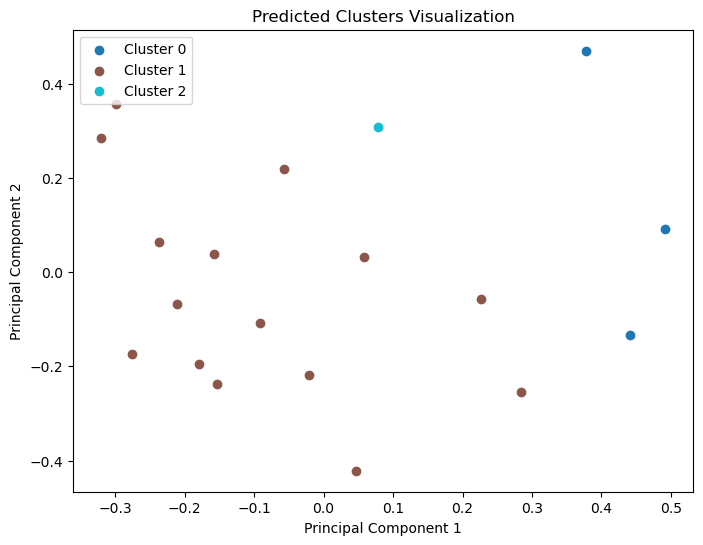

In [157]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))

# Generate colors dynamically based on the number of clusters
colors = plt.cm.tab10(np.linspace(0, 1, k))

for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=[colors[i]], label=f'Cluster {i}')

plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
